In [27]:
import numpy as np  

import re  
import pandas as pd 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   

import warnings
warnings.filterwarnings("ignore")

In [28]:
import nltk

In [29]:
stop_words = set(stopwords.words('english')) 

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

data=pd.read_csv("E:/user/Notebooks/data/tweetdisaster/train.csv", low_memory=False)

In [31]:
data.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
data.dropna(axis=0,inplace=True)   #dropping na

In [32]:
data.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


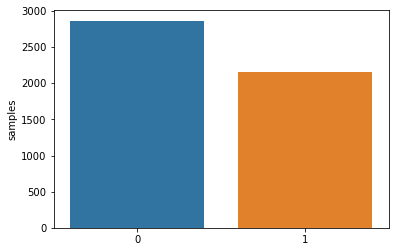

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
x=data.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples');

0 olan tweet daha fazla yani sahte felaket haberleri çoğunlukta

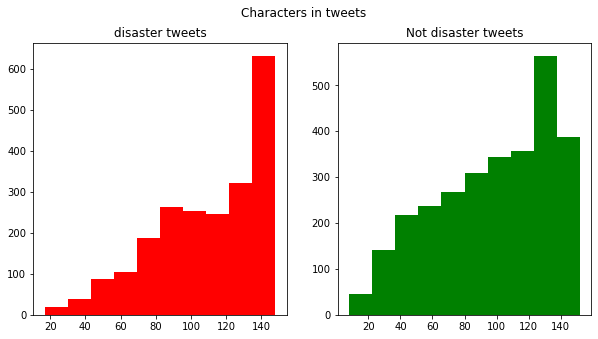

In [34]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data[data['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=data[data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [35]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [36]:
from bs4 import BeautifulSoup
porter = nltk.PorterStemmer()
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'https?://\S+|www\.\S+','',newString)
    newString=re.sub(r'<.*?>','',newString)                   
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
     
    tokens = [porter.stem(w)  for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()
   
cleaned_text = []
for t in data['text']:
    cleaned_text.append(text_cleaner(t))

In [37]:
data.text[:5]

31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
32    We always try to bring the heavy. #metal #RT h...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
34                   Crying out for more! Set me ablaze
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
Name: text, dtype: object

In [38]:
data.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [39]:
data['cleaned_text']=cleaned_text

In [40]:
data[15:30]

,id,keyword,location,text,target,cleaned_text
53,77,ablaze,Anaheim,Police: Arsonist Deliberately Set Black Church...,1,polic arsonist deliber set black church north ...
54,78,ablaze,Abuja,Noches El-Bestia '@Alexis_Sanchez: happy to se...,0,noch bestia alexi sanchez happi see teammat tr...
55,79,ablaze,USA,#Kurds trampling on Turkmen flag later set it ...,1,kurd trampl turkmen flag later set ablaz other...
56,80,ablaze,South Africa,TRUCK ABLAZE : R21. VOORTREKKER AVE. OUTSIDE O...,1,truck ablaz voortrekk ave outsid tambo intl ca...
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0,set heart ablaz everi citi gift everi skylin l...
58,82,ablaze,hollywoodland,They sky was ablaze tonight in Los Angeles. I'...,0,sky ablaz tonight angel expect fill sunset sho...
59,83,ablaze,"Edmonton, Alberta - Treaty 6",How the West was burned: Thousands of wildfire...,1,west burn thousand wildfir ablaz california al...
61,86,ablaze,Inang Pamantasan,Progressive greetings!\n\nIn about a month stu...,0,progress greet month student would set pen abl...
62,89,ablaze,Twitter Lockout in progress,Rene Ablaze &amp; Jacinta - Secret 2k13 (Falle...,0,rene ablaz jacinta secret mar
63,91,ablaze,"Concord, CA",@Navista7 Steve these fires out here are somet...,1,navista steve fire someth els california tinde...


In [41]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer() 

#vectorizer.fit(cleaned_text)
#train_predictions = np.round(self.model.predict(self.X_train, verbose=0)) 
X = vectorizer.fit_transform(cleaned_text).toarray()

In [42]:
X.shape

(5021, 9939)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,data['target'].values,test_size=0.1,random_state=0,shuffle=True) 

In [48]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
from collections import defaultdict
from wordcloud import STOPWORDS

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 20
DISASTER_TWEETS = data['target'] == 1
# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in data[DISASTER_TWEETS]['cleaned_text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in data[~DISASTER_TWEETS]['cleaned_text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

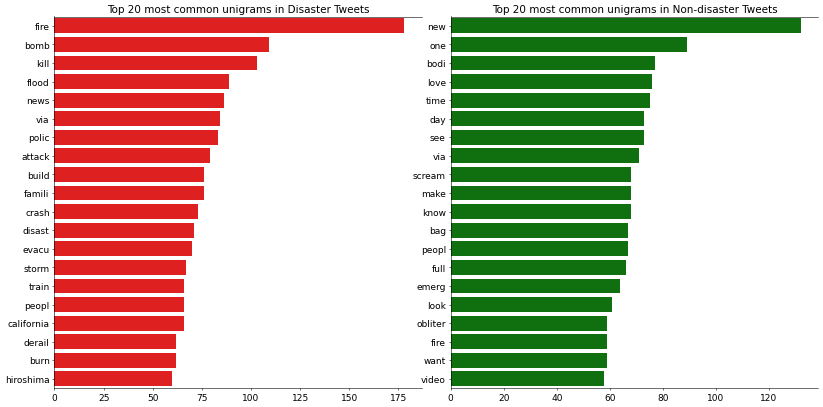

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 8), dpi=50)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

gerçek felaket tweetlerinde en çok kullanılan kelimeler genellikle felaket ile alakalı terimlerden oluşmaktadır.

In [49]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs')
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values) 

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.571270,0.570577
1,0.010,0.725764,0.705765
2,0.100,0.866534,0.779324
3,1.000,0.959274,0.783300
4,10.000,0.988269,0.775348
5,100.000,0.989597,0.753479
6,1000.000,0.989597,0.757455


c=1 değeri en optimal accuracysiyi verdi.

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clfs = {
    'Logistic_Regression': LogisticRegression(penalty = 'l2', C = 1, random_state = 0, solver='lbfgs'),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=5),
    'Decision_tree': DecisionTreeClassifier(criterion='entropy'),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=25, random_state=2)
    
}

for clf_name in clfs.keys():
    print("Training",clf_name,"classifier")
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(classification_report(y_test, y_predict))
    print()

Training Logistic_Regression classifier
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       286
           1       0.73      0.69      0.71       217

    accuracy                           0.76       503
   macro avg       0.75      0.75      0.75       503
weighted avg       0.76      0.76      0.76       503


Training KNeighborsClassifier classifier
              precision    recall  f1-score   support

           0       0.65      0.97      0.78       286
           1       0.88      0.32      0.47       217

    accuracy                           0.69       503
   macro avg       0.77      0.64      0.62       503
weighted avg       0.75      0.69      0.64       503


Training Decision_tree classifier
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       286
           1       0.74      0.67      0.71       217

    accuracy                           0.76       503
   macro av

tahmin ettiklerimin gerçekten deprem tweeti olup olmadığına önem verdiğimden precison değerinin en yüksek olduğu random forest değerimiz daha iyi bir sonuç verdi.

In [59]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.8)
pca.fit(X)
x_pca=pca.transform(X)



In [60]:
X.shape, data['target'].shape

((5021, 9939), (5021,))

In [61]:
print("sum: ",sum(pca.explained_variance_ratio_))
len(np.cumsum(pca.explained_variance_ratio_))

sum:  0.8001199643087171


1193

In [62]:
x_pca.shape

(5021, 1193)

In [63]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(x_pca,data['target'].values,test_size=0.1,random_state=0,shuffle=True) 

In [64]:
from sklearn.model_selection import cross_val_score
log_reg=LogisticRegression(penalty = 'l2', C = 1, random_state = 0, solver='lbfgs')
log_reg.fit(X_train_pca, y_train_pca)

LogisticRegression(C=1, random_state=0)

In [65]:
log_reg

LogisticRegression(C=1, random_state=0)

In [66]:
print(cross_val_score(log_reg, X_train_pca,y_train_pca, cv=5))

[0.78650442 0.77654867 0.78429204 0.7641196  0.79512735]


In [67]:
print(cross_val_score(log_reg, X_test_pca,y_test_pca, cv=5))

[0.69306931 0.7029703  0.77227723 0.74       0.7       ]


Logistic regression ile eğittiğimiz modelimizin performansı cross validation sonucuna göre tesadüf değil çünkü 5 farklı alt küme değerleri birbirine yakın sonuçlar vermektedir.

 lemmatization , Jaccard distance

In [81]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=25, random_state=2)
random_forest.fit(X_train_pca, y_train_pca)

RandomForestClassifier(n_estimators=25, random_state=2)

In [82]:
train_prediction = random_forest.predict(X_train_pca)
test_prediction = random_forest.predict(X_test_pca)

In [83]:
print(classification_report(y_test_pca, test_prediction))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       286
           1       0.68      0.54      0.61       217

    accuracy                           0.69       503
   macro avg       0.69      0.68      0.68       503
weighted avg       0.69      0.69      0.69       503



Training RandomForestClassifier classifier
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       286
           1       0.78      0.64      0.70       217

    accuracy                           0.77       503
   macro avg       0.77      0.75      0.76       503
weighted avg       0.77      0.77      0.76       503

## SMOTE

In [84]:
from imblearn.over_sampling import SMOTE

In [88]:
smt=SMOTE(random_state=0)
smote_test, smote_target = smt.fit_sample(X_test_pca, y_test_pca)

In [90]:
test_prediction = random_forest.predict(smote_test)
print(classification_report(smote_target, test_prediction))

              precision    recall  f1-score   support

           0       0.61      0.81      0.69       286
           1       0.71      0.48      0.57       286

    accuracy                           0.64       572
   macro avg       0.66      0.64      0.63       572
weighted avg       0.66      0.64      0.63       572



## SVM

In [91]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1,degree=6)
svc.fit(X_train_pca, y_train_pca)
#[0.1, 1, 10, 100, 1000, 10000]
   

SVC(C=1, degree=6)

In [92]:
from sklearn.metrics import accuracy_score
y_pred= svc.predict(X_test_pca)
print("Accuracy Rate of SVC: {:.4f}".format(accuracy_score(y_test_pca, y_pred)))

Accuracy Rate of SVC: 0.7932


In [103]:
 from sklearn.metrics import precision_score
 print("Precision Rate of SVC: {:.4f}".format(precision_score(y_test_pca, y_pred)))   

Precision Rate of SVC: 0.8229


## XGBOOST

In [95]:
import xgboost as xgb
dmatrix = xgb.DMatrix(data = X_train_pca, label=y_train_pca)
#DM_train = xgb.DMatrix(data = X_train_pca, label=y_train)
#DM_test =  xgb.DMatrix(data = X_test, label=y_test)

In [96]:
model=xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
                        objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model.fit(X_train_pca, y_train_pca)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [97]:
print('Accuracy value of XGBOOST: ',model.score(X_test_pca ,y_test_pca))

Accuracy value of XGBOOST:  0.7833001988071571


In [98]:
xgb_param = model.get_xgb_params()

#params = {"objective":"reg:logistic", "max_depth":5, "silent":0}

In [99]:
cv = xgb.cv(dtrain=dmatrix, params=xgb_param,
                    num_boost_round=model.get_params()['n_estimators'], metrics="error", nfold=5, as_pandas=True, seed=123)
display(cv)

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.247842,0.002299,0.301232,0.019951
1,0.230245,0.005254,0.290388,0.013302
2,0.221834,0.009078,0.278878,0.016610
3,0.214641,0.007254,0.276221,0.018264
4,0.210048,0.010404,0.280428,0.015319
...,...,...,...,...
995,0.011233,0.000512,0.229303,0.010767
996,0.011233,0.000512,0.228862,0.010340
997,0.011233,0.000512,0.228639,0.009995
998,0.011233,0.000512,0.228418,0.009597


In [101]:
print('Accuracy Value of train: {:.3f}'.format((1-cv["train-error-mean"]).max()))

Accuracy Value: 0.989


In [102]:
print('Accuracy Value of test: {:.3f}'.format((1-cv["test-error-mean"]).max()))

Accuracy Value: 0.778


## LIGHTGBM

In [57]:
!pip install lightgbm

In [104]:
import lightgbm as lgb

In [105]:
params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10}

In [106]:
d_train = lgb.Dataset(data = X_train_pca, label=y_train_pca)

In [107]:
lgb_model = lgb.train(params, d_train, num_boost_round = 100)

[LightGBM] [Info] Number of positive: 1937, number of negative: 2581
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 304214
[LightGBM] [Info] Number of data points in the train set: 4518, number of used features: 1193
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.428730 -> initscore=-0.287037
[LightGBM] [Info] Start training from score -0.287037


In [108]:
y_predict=lgb_model.predict(X_test_pca)
y_predict = [0 if y_predict < 0.5 else 1 for y_predict in y_predict]

In [109]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_predict,y_test)
print('Accuracy Value with LIGHTGBM: {:.3f}'.format(accuracy))

Accuracy Value with LIGHTGBM: 0.771


In [110]:
print('Accuracy Value with LIGHTGBM: {:.3f}'.format(precision_score(y_test_pca, y_pred)))

Accuracy Value with LIGHTGBM: 0.823
